In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/amandeep0/IS451/main/data/loans.csv")

In [ ]:
df.head()

,CreditPolicy,Purpose,IntRate,Installment,LogAnnualInc,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,NotFullyPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.shape   #checking the count of observations & no. of columns

(9578, 14)

In [ ]:
zeros = (df['NotFullyPaid'] == 0).sum()
ones = (df['NotFullyPaid'] == 1).sum()
proportion_zeros = zeros / df.shape[0]

print(zeros, ones, proportion_zeros)

8045 1533 0.8399457089162664


In [ ]:
# (a) (i)

# used stratify as the proportion of 0s and 1s are quite different

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['NotFullyPaid'])
accuracy_baseline = np.sum(0 == df_test['NotFullyPaid'])/df_test.shape[0]
print(accuracy_baseline)

0.8399443284620738


In [ ]:
# (a) (ii)

formula = "NotFullyPaid ~ " + " + ".join([col for col in df_train.columns if col != "NotFullyPaid"])
model = smf.logit(formula, data=df_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.408503
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           NotFullyPaid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                 0.07107
Time:                        21:53:36   Log-Likelihood:                -2738.6
converged:                       True   LL-Null:                       -2948.1
Covariance Type:            nonrobust   LLR p-value:                 9.569e-78
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.5239      1.533      4.908      0.

(a) (ii)

The **model predicts the chances of loan not being paid** fully using all the given financial/ categorical predictors.

Positive **coefficient** means as the variable value increases, chances of loan not being fully paid increases; and vice versa. For e.g. it is intuitive that as interest rate increases, probability of defaulting on loan would increase.

Looks like the model acocunted for **seasonality** resulting from 'Purpose' column.

Logistic **Regression Equation** :-

log(P(NotFullyPaid)/(1-P)(NotFullyPaid)) =

7.5239−0.5935*Purpose[credit_card]−0.3487*Purpose[debt_consolidation]−0.0655*Purpose[educational]+0.0849*Purpose[home_improvement]−0.7125*Purpose[major_purchase]+0.5429*Purpose[small_business]−
0.3236*CreditPolicy+2.0479*IntRate+0.0011*Installment−0.3908*LogAnnualInc−0.0025*Dti−0.0079*Fico+2.073𝑒−05*DaysWithCrLine+2.67𝑒−06*RevolBal+0.0037*RevolUtil+0.1021*InqLast6mths−0.0573*Delinq2yrs+0.2030*PubRec

**Significant independent variables**: -
Purpose[T.credit_card] ,
Purpose[T.debt_consolidation] ,
Purpose[T.major_purchase] ,
Purpose[T.small_business] ,
CreditPolicy ,
Installment ,
LogAnnualInc ,
Fico ,
RevolBal ,
RevolUtil ,
InqLast6mths

When purpose is educational or home improvement, the model suggests it isn't really significant to predict loan repayment likelihood.

In [ ]:
# (a) (iii)

beta_Fico = -0.0079
Fico_A = 700
Fico_B = 710
Logit_A = beta_Fico * Fico_A
Logit_B = beta_Fico * Fico_B
print(Logit_A-Logit_B)

0.07900000000000063


In [ ]:
# (a) (iv)

df_test['PredictedRisk']=(result.predict(df_test)>0.5)*1

accuracy = np.sum(df_test['PredictedRisk'] == df_test['NotFullyPaid'])/df_test.shape[0]
print(accuracy)

0.8392484342379958


(a) (iv)

Both accuracies are quite close (0.8392 vs. 0.8399), indicating that the model's predictions are not significantly better than the baseline.

In [ ]:
pd.crosstab(df_test['NotFullyPaid'],df_test['PredictedRisk'])

PredictedRisk,0,1
NotFullyPaid,,
0,2395,19
1,443,17


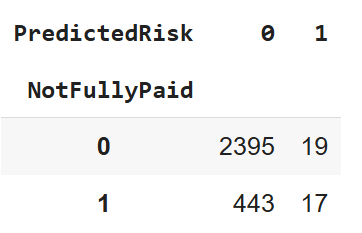

In [ ]:
# (a) (v)

precision = 17/(19+17)
recall = 17/(17+443)
f1 = 2*precision*recall/(precision + recall)
print(precision, recall, f1)

0.4722222222222222 0.03695652173913044 0.06854838709677419


(a) (v)

Almost half of the predicted positives are actual positives. Model only captures 3.7% of actual positives; hence, missing large number of cases which may default. Low F1 score means poor balance between precision & recall.

Hence, model may not be useful for investors.

In [ ]:
# (b) (i)

model2 = smf.logit("NotFullyPaid ~ IntRate",data = df_train)
result2 = model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.426440
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           NotFullyPaid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6702
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                 0.03029
Time:                        21:53:37   Log-Likelihood:                -2858.9
converged:                       True   LL-Null:                       -2948.1
Covariance Type:            nonrobust   LLR p-value:                 9.877e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7806      0.170    -22.263      0.000      -4.113      -3.448
IntRate       16.7572      1.

(b) (i)

Interest Rate is significant in this model given that its p-value is very small (less than 5%). It wasn't significant in previous model as p-value was large (0.318). This means that, when we consider multiple variables, IntRate doesn't have a strong effect in predicting whether the loan will be fully paid. The reason could be **multicollinearity**.

This can be further looked into through a correlation matrix below. We can see that IntRate is highly negatively correlated with Fico and quite strong positive correlation with RevolUtil.

In [ ]:
numeric_df = df_train.select_dtypes(include=np.number)
numeric_df.corr()

,CreditPolicy,IntRate,Installment,LogAnnualInc,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,NotFullyPaid
CreditPolicy,1.000000,-0.299228,0.057743,0.032012,-0.091137,0.348865,0.083856,-0.192859,-0.105643,-0.540810,-0.075905,-0.055405,-0.161662
IntRate,-0.299228,1.000000,0.272062,0.047829,0.229081,-0.708755,-0.118423,0.097808,0.467839,0.206003,0.148448,0.099820,0.163244
Installment,0.057743,0.272062,1.000000,0.449652,0.067288,0.085771,0.186489,0.239226,0.084201,-0.005516,-0.012374,-0.027173,0.052686
LogAnnualInc,0.032012,0.047829,0.449652,1.000000,-0.043641,0.114775,0.338329,0.369532,0.064467,0.041617,0.025612,0.018619,-0.025925
Dti,-0.091137,0.229081,0.067288,-0.043641,1.000000,-0.241768,0.069547,0.192831,0.344791,0.030642,-0.021968,-0.005977,0.036041
Fico,0.348865,-0.708755,0.085771,0.114775,-0.241768,1.000000,0.257139,-0.019828,-0.545720,-0.186993,-0.216105,-0.148546,-0.146154
DaysWithCrLine,0.083856,-0.118423,0.186489,0.338329,0.069547,0.257139,1.000000,0.230547,-0.018825,-0.031372,0.074460,0.074600,-0.016469
RevolBal,-0.192859,0.097808,0.239226,0.369532,0.192831,-0.019828,0.230547,1.000000,0.209072,0.034259,-0.026175,-0.039560,0.058397
RevolUtil,-0.105643,0.467839,0.084201,0.064467,0.344791,-0.545720,-0.018825,0.209072,1.000000,-0.009467,-0.039970,0.067874,0.088384
InqLast6mths,-0.540810,0.206003,-0.005516,0.041617,0.030642,-0.186993,-0.031372,0.034259,-0.009467,1.000000,0.023886,0.080461,0.157746


In [ ]:
# (b) (ii) Making predictions

prediction2 = result2.predict(df_test)
prediction2

,0
1102,0.109923
5350,0.092578
3323,0.150001
2147,0.102760
7471,0.106687
...,...
3196,0.137032
7981,0.107971
271,0.211261
3259,0.102760


In [ ]:
# (b) (ii) Highest probability of loan not being fully paid on test set

max_prob = np.max(prediction2)
print(f"Highest probability of a loan not being paid back in full: {max_prob}")

Highest probability of a loan not being paid back in full: 0.44362906300227267


In [ ]:
# (b) (ii) Number of loans expected to default (fully/partially) with a threshold probability 0.5

df_test['PredictedRisk2']=(result2.predict(df_test)>0.5)*1
num_not_fully_paid = np.sum(df_test['PredictedRisk2'] == 1)
print(f"Number of loans expected to default: {num_not_fully_paid}")

Number of loans expected to default: 0


In [ ]:
pd.crosstab(df_test['NotFullyPaid'],df_test['PredictedRisk2'])

PredictedRisk2,0
NotFullyPaid,
0,2414
1,460


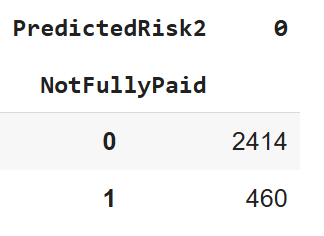

In [ ]:
# (b) (iii)

precision2 = 1
recall2 = 0
f1_2 = 2*precision2*recall2/(precision2 + recall2)
print(precision2, recall2, f1_2)

1 0 0.0


(b) (iii)

Precision is 1 because all predicted positives are true positives.
Model did not predict any instances of "Not Fully Paid" but there are such cases. This means that model missed all actual positives resulting in recall 0.

Comparison of the 2 models: -

Pseudo R-sq: Model 1 = 0.07107 ; Model 2 = 0.03029. Higher the better. Values suggest that Model 1 shows a better fit.

F1 score: Model 1 = 0.0.0685 ; Model 2 = 0. Higher the better. Again, Model 1 performs better in terms of F1 score. Although Model 2 has a perfect precision, but it is unable to identify any not fully paid loans.

Model 1 has several predictors out of which many of them are statistically significant. Model 2 relies on only 1 predictor.

Comparatively, **Model 1** seems to be a stronger model.

In [ ]:
# (c) (i)  Payback = c * exp(rt)

c = 10   #$
r = 0.06   #per annum
t = 3   #years

payback = c * np.exp(r*t)
print(f"A $10 investment with a 6% interest rate per annum pays back ${payback} after 3 years.")

A $10 investment with a 6% interest rate per annum pays back $11.972173631218102 after 3 years.


In [ ]:
# (c) (ii)

print(f"Profit to the investor if the investment is paid back in full: ${payback-c}.")
print(f"Profit to the investor if the investment is not paid back in full: ${-c}, i.e. a loss of ${c}.")    #investor loses money invested

Profit to the investor if the investment is paid back in full: $1.9721736312181015.
Profit to the investor if the investment is not paid back in full: $-10, i.e. a loss of $10.


In [ ]:
# (c) (iii) Profit of $1 investment in each loan

c2 = 1
df_test['payback'] = c2 * np.exp(df_test['IntRate'] * t)
df_test['profit'] = np.where(df_test['NotFullyPaid'] == 0, df_test['payback'] - c2, -c2)
max_profit = df_test['profit'].max()
print(f"Maximum profit to the investor if the investment is paid back in full: ${max_profit}.")

Maximum profit to the investor if the investment is paid back in full: $0.8894768654675331.


In [ ]:
# (c) (iv)

HighInterest = df_test[df_test['IntRate'] >= 0.15]
HighInterest

average_profit_high_interest = HighInterest['profit'].mean()
proportion_not_paid_full = np.sum(HighInterest['NotFullyPaid']) / HighInterest.shape[0]

print(f"Average profit from $1 investment in high-interest loans: ${average_profit_high_interest}")
print(f"Proportion of high-interest loans not paid back in full: {proportion_not_paid_full:.2%}")

Average profit from $1 investment in high-interest loans: $0.23986972902172937
Proportion of high-interest loans not paid back in full: 24.58%


In [ ]:
# (c) (v)
SelectedLoans = HighInterest.nsmallest(100, 'PredictedRisk')
SelectedLoans

total_profit_selected_loans = SelectedLoans['profit'].sum()
num_not_fully_paid_selected = SelectedLoans['NotFullyPaid'].sum()
profit_simple = 20.94

print(f"Total profit from investing $1 in the 100 selected loans: ${total_profit_selected_loans:.2f}")
print(f"Number of selected loans not paid back in full: {num_not_fully_paid_selected}")
print(f"Profit per loan using simple investment strategy: ${profit_simple}")

Total profit from investing $1 in the 100 selected loans: $33.57
Number of selected loans not paid back in full: 19
Profit per loan using simple investment strategy: $20.94


The high interest investment strategy is more profitable than simple investment strategy. This could be because of better risk-return balance. The high interest strategy targets loans with low risk amongst those with high interest.

(d)

Predictive modeling relies heavily on the assumption that **past is a correct representation of future** and that historical patterns will continue.

This can be challenging because of volatile economy, unpredictable people's behaviour, regulatory changes, events like natural calamities/ pandemic, etc.

To improve the situation in financial settings, one can improve the model by:


*   Regularly updating the model -> real-time updates & tracking performance
*   Using a long history of data to predict unusual & less frequent events
*   Taking advice from financial experts to capture economic variables better
*   Stress testing -> Does the model look right in extreme conditions?
*   Sensitivity testing -> Which variables are more critical to analyze?
*   Using several other methodologies like Bayesian methods, Time Series, Stochastic methods, Clustering/ ML techniques etc and cross-validating the model through different methods & out-of-sample datasets
*   Good risk management practices like:
1.    Maintaining sufficient capital reserves
2.    Diversification
3.    Risk limits
4.    Contingency planning
5.    Insurance
6.    Enterprise Risk management framework
















